<h1><center>cs1001.py , Tel Aviv University, Spring 2020</center></h1>
<img src="http://www.pngall.com/wp-content/uploads/2016/05/Python-Logo-PNG-Image-180x180.png" width=50/>

## Exam recitation

We went over various questions from previous exams

###### Takeaways:
- The exam is easy, all you have to do is write down the correct answers
- When in doubt, bet on 42

#### Code for printing several outputs in one cell (not part of the recitation):

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 2017AA Q5

Given a list of sentences (each one a string over "A-Z" and " "), implement a structure supporting two operations:

* ```create_structure``` - the input is a list of sentences, the output is the structure
* ```find``` - the input is a word, the output is all sentences containing it

```find``` needs to run in $O(1)$ on average and ```create_structure``` has no limitation.

The idea - use a hashtable, map words to sentences containing them.

In [2]:














def create_structure(lst):
    d = {}
    for sentence in lst:
        words = set(sentence.split(" ")) #Why set??? A.C: O(k), W.C. O(k^2)
        for word in words:
            if word in d:
                d[word] += [sentence]
            else:
                d[word] = [sentence]
    return d

def find(structure, word):
    if word in structure:
        return structure[word]
    return []

st = create_structure(["hi bye bye", "bye hi why"])
find(st, "bye")
find(st, "why")

['hi bye bye', 'bye hi why']

['bye hi why']

##  Analyze the runtime complexity of ```create_structure```

Let $n$ be the number of sentences and $k$ be the maximal number of words in a sentence.

Each ```set``` construction runs in time $O(k)$ on average and $O(k^2)$ in the worst case.

For each of the $n\cdot k$ words in the input we need to access ```d```. The running time for each access is $O(1)$ in the average case and $O(|d|)$ in the worst case. Therefore, in total the running time is $O(nk)$ in the average case and $O(n^2k^2)$ in the worst case (note that this part of the process dominates the cost of sets construction).

##  Improve running time when each word is of length 1

If we are guaranteed all words are letters, can we do better? Yes! 

Instead of our dictionary, ```create_structure``` will init. a list of length 26. We will again convert each sentence to a set of letters and then iterate over the set adding sentence to ```lst[i]``` if it contains the `i`th letter in the abc.

Now find will work in $O(1)$ in the worst case since we only need to access a list at a specific index.

## 2018AA5: Rotating trees

Given two Binary Trees $T,S$ we say that $T$ and $S$ are equivalent if they are the same up to a sequence of switching between left and right sons of some of the nodes in the trees. 

The following trees are equivalent:

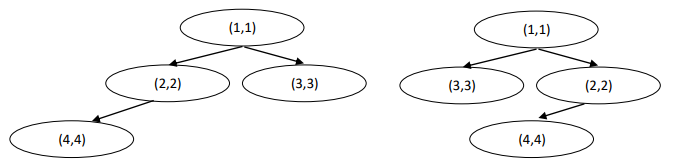

But they are not equivalent to this tree:

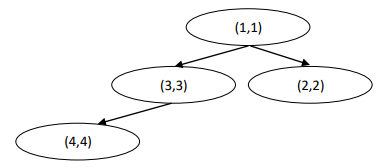

Implement ```equiv(r1, r2)``` which gets two root nodes ```r1, r2``` and return `True` iff they represent roots of equivalent trees. The function should be recursive.


In [ ]:
class Tree_node():
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.left = None
        self.right = None

    def __repr__(self):
        return "(" + str(self.key) + ":" + str(self.val) + ")"

    def __eq__(self,other):
        if other==None:
            return False
        if self.key==other.key and self.val==other.val:
            return True
        else:
            return False    
        
class Binary_search_tree():

    def __init__(self):
        self.root = None


    def __repr__(self): #no need to understand the implementation of this one
        out = ""
        for row in printree(self.root): #need printree.py file
            out = out + row + "\n"
        return out


    def lookup(self, key):
        ''' return node with key, uses recursion '''

        def lookup_rec(node, key):
            if node == None:
                return None
            elif key == node.key:
                return node
            elif key < node.key:
                return lookup_rec(node.left, key)
            else:
                return lookup_rec(node.right, key)

        return lookup_rec(self.root, key)



    def insert(self, key, val):
        ''' insert node with key,val into tree, uses recursion '''

        def insert_rec(node, key, val):
            if key == node.key:
                node.val = val     # update the val for this key
            elif key < node.key:
                if node.left == None:
                    node.left = Tree_node(key, val)
                else:
                    insert_rec(node.left, key, val)
            else: #key > node.key:
                if node.right == None:
                    node.right = Tree_node(key, val)
                else:
                    insert_rec(node.right, key, val)
            return
        
        if self.root == None: #empty tree
            self.root = Tree_node(key, val)
        else:
            insert_rec(self.root, key, val)


The idea is:
- Two leaves are equivalent if their key and value are equivalent
- Two trees are equivalent if:
    - Their roots agree on their keys and values
    - Their left sons `L1, L2` and right sons `R1,R2` are equivalent, or `L1, R2` and `L2, R1` are equivalent


In [ ]:





















def equiv(node1, node2):
    if node1 == node2 == None:
        return True
    if node1 == None or node2 == None or node1 != node2:
        return False
    no_switch = equiv(node1.left, node2.left) and equiv(node1.right, node2.right)
    switch = equiv(node1.left, node2.right) and equiv(node1.right, node2.left)
    return switch or no_switch



In [ ]:
T1 = Binary_search_tree()
T1.insert(1,1)
T1.root.left = Tree_node(2,2)
T1.root.right = Tree_node(3,3)
T1.root.left.left = Tree_node(4,4)

T2 = Binary_search_tree()
T2.insert(1,1)
T2.root.left = Tree_node(3,3)
T2.root.right = Tree_node(2,2)
T2.root.right.left = Tree_node(4,4)

T3 = Binary_search_tree()
T3.insert(1,1)
T3.root.left = Tree_node(3,3)
T3.root.right = Tree_node(2,2)
T3.root.left.left = Tree_node(4,4)

equiv(T1.root,T2.root)
equiv(T1.root,T3.root)
#k = Tree_node(1,1)
#p = Tree_node(1,1)
#k == p

Can memoization help? Not really, since subtrees can be disjoint, we will never reach a tree we've already examined.

Next, given two roots of `T1,T2` determine if there exists a non-empty subtree of `T1` equivalent to a subtree of `T2`.

Wait, why is the non-empty requirement important here?

The idea
- If the two roots are equivalent (and not empty) we are done
- If one of the roots is `None`, we are done
- Otherwise:
    - There may be a subtree of `T2` equivalent to `T1`
    - Or a subtree of `T1` equivalent to `T2`

In [ ]:






















def subequiv(node1, node2):
    if equiv(node1, node2) and node1 != None:
        return True
    if node1 == None or node2 == None:
        return False
    t1_stays = subequiv(node1, node2.left) or subequiv(node1, node2.right)
    t2_stays = subequiv(node1.left, node2) or subequiv(node1.right, node2)
    return t1_stays or t2_stays

In [ ]:
subequiv(T1.root,T2.root)
T4 = Binary_search_tree()
T4.insert(100,100)
T4.root.left = T2.root
subequiv(T4.root, T2.root)

# Since they share leaves
subequiv(T2.root, T3.root)

## 2017AB2: Jump

Given a list `lst` of `n` integers where `lst[0]=0` we want to get to `lst[n-1]` by jumping to the right (i.e. - advancing in the list). 

We init a counter `cnt=0` and if we add `lst[i]` to the counter for every index `i` we visit.

For example, if `lst=[0, 3, -5, 10, -5]` and our steps are $1, 1, 2$ the penalty is $3-5+5=3$.

Implement `jump` which gets a list as described above and returns the minimal total penalty.

The idea: We must visit `lst[-1]` and we should visit any index `i` s.t. `lst[i] < 0`.

In [ ]:
def jump(lst):
    # Note the range!
    return lst[-1] + sum(lst[i] for i in range(len(lst)-1) if lst[i] < 0)

jump([0,4,5,1,2,-3,-5])

jump([0,4,5,1,2,-3,2])

#three parameters: lst, max_jump, i (=our location in the list)

Jump limited - we now get a parameter `max_jump` and we can now advance only `1 <= i <= max_jump`  steps in each move.

Implement `jump_rec` recursively and without slicing.

In [ ]:




















def jump_lim(lst, max_jump):
    return jump_rec(lst, max_jump, 0)

def jump_rec(lst, max_jump, ind):
    if ind == len(lst) - 1:
        return lst[ind]
    cnt = float("inf") #Python's representation of infinity, x < float("inf") for any x that is integer or float
    for j in range(1, max_jump + 1):
        if ind+j < len(lst):
            res = jump_rec(lst, max_jump, ind+j) + lst[ind]
        if res < cnt:
            cnt = res
    return cnt
        
jump_lim([0,4,5,1,2,-3,2], 100)
jump_lim([0, 2, 2, 0, 4], 3)

Add memoization:

In [ ]:
def jump_lim(lst, max_jump):
    d = {}
    return jump_rec_mem(lst, max_jump, 0, d)

def jump_rec_mem(lst, max_jump, ind, d):
    if ind == len(lst) - 1:
        return lst[ind]
    if ind in d:
        return d[ind]
    
    cnt = float("inf")
    for j in range(1, max_jump + 1):
        if ind+j < len(lst):
            if ind + j in d:
                res = d[ind + j] + lst[ind]
            else:
                d[ind + j] = jump_rec_mem(lst, max_jump, ind+j, d)
                res = d[ind + j] + lst[ind]
        if res < cnt:
            cnt = res
    d[ind] = cnt
    return cnt
        
jump_lim([0,4,5,1,2,-3,2], 100)
jump_lim([0, 2, 2, 0, 4], 3)

## 2019AB2: Matching strings
Given a list of strings `str_lst` and a string `word` we say we can construct `word` from `str_lst` if we can pick at most 1 char from each string in the list that yield `word`.

For example, we can construct "Raz" from `["abc", "FOR", "buzz"]` and also from `["abc", "FOR", "aaa", "buzz", "hello"]` but not from `["az", "FOR", "jkl"]`

Implement the recursive function `construct_rec`. 

The idea is that we maintain an index `j` s.t. we need to construct `word[j:]` from the list of strings.

- If `j==len(word)` we are done.
- Otherwise, we go over the list, for each string we check if it contains `word[j]` and if so we recurse on `j+1` and ommit that string from the list
- If we exit the loop without success, we return `False`

In [ ]:
def construct(str_list, word):
    if len(str_list) < len(word):
        return False
    return construct_rec(str_list, word, 0)

def construct_rec(str_list, word, j):
    if j == len(word):
        return True
    for i in range(len(str_list)):
        if word[j] in str_list[i]:
            if construct_rec(str_list[:i]+str_list[i+1:], word, j+1):
                return True
    return False
            
construct(["abc", "FOR", "buzz"], "Raz")    
construct(["az", "FOR", "jkl"], "Raz")    
construct(["az", "FOR", "hello","a"], "Raz")

It is important to not ethat if the recursive call in line 11 fails we do not immediately return `False` (as in, this is not a greedy algorithm). For example, this greedy approach would fail on `Raz` and `["Rabc", "FOR", "buzz"]` even though we can construct the word from this list.

Now we need to solve a variant where the order of the strings we take must agree with the order of characters in `word`.

E.g., now we can no longer construct "Raz" from `["abc", "FOR", "buzz"]` but we can from `["FOR", "abc", "jkl", "buzz"]`.

The new solution should run in time $O(n)$ where $n$ is the length fo the string list.

The idea: we can now be greedy. Whenever we can take a certain string we should, because we will not be able to take it from characters later on.

In [ ]:
def construct_order(str_list, word):
    i = 0
    j = 0
    while i < len(word) and j < len(str_list):
        if word[i] in str_list[j]:
            i += 1
        j += 1
        
        if i == len(word):
            return True
        
    return False
        
            
construct_order(["abc", "FOR", "buzz"], "Raz")    
construct_order(["FOR", "abc", "buzz"], "Raz") 

# Binary Search

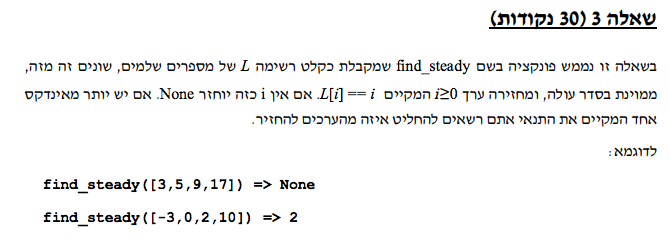

Implement find_steady, a function that receives a list `L` of sorted (ascending) unique integers, and returns a value `i >= 0` s.t. `L[i] == i`. If there is no such `i`, None is returned. If there is more than one such index, any one of them can be returned.

For example:  

`find_steady([3, 5, 9, 17]) == None`

`find_steady([-3, 0, 2, 10]) == 2`


### Naive solution

In [ ]:
def find_steady(lst):
    for i in range(len(lst)):
        if lst[i] == i:
            return i
    
    return None

print(find_steady([3, 5, 9, 17]))
print(find_steady([-3, 0, 2, 10]))

### Binary search solution

In [ ]:
def find_steady(lst):
    n = len(lst)
    left = 0
    right = n-1
    while left <= right:
        middle = (right + left) // 2 # middle rounded down
        if middle == lst[middle]: # item found
            return middle
        elif middle < lst[middle]: # item not in top half
            right = middle - 1
        else: # item not in bottom half
            left = middle + 1

    return None

print(find_steady([3, 5, 9, 17]))
print(find_steady([-3, 0, 2, 10]))

What just happened? The crucial point about this algorithm is the following: if $lst[mid] > mid$ then a fixed point cannot exist above $mid$. Why is that? 

Assume there exists some $j = mid+k$ for some $k>0$ such that $lst[j] == j$. Note that $lst[mid] \geq mid + 1$. Now, as the elements in $lst$ are unique, we must have $lst[j] == lst[mid + k] \geq mid + k + 1 > j$

A similar argument shows that if $lst[mid] < mid$ then a fixed point cannot exist below $mid$, thus we get the correctness of the algorithm.

### Questions

* What is the worst case running time of each solution?
* What happens to each solution if the list is not guaranteed to be sorted?
* What happens to each solution if the list is not guaranteed to be unique?

## 2018BA3: Max repeating substring

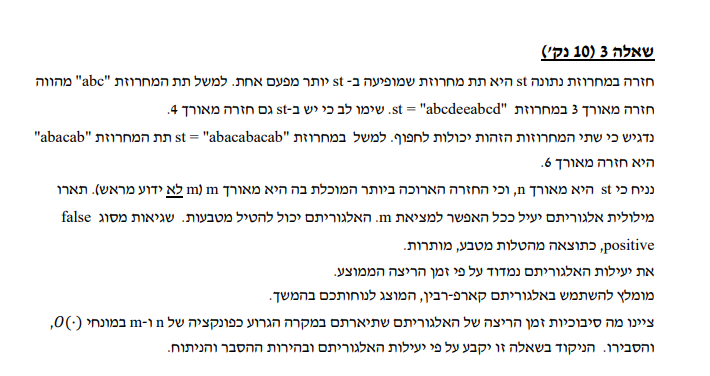

"The algorithm can toss coins, and there could be false positive errors due to coin tossing" means that the algorithm may include some randomness that could possibly affect the number of false positives. As in Karp Rabin and the choice of $r$.




A bad solution:


try all values of $m$ between $1$ and $n$, and for each value $i$ compute the list of fingerprints of all substrings of length $i$ in $st$ (Using text_fingerprints function). The length of the list is $n-i$ and it contains values of constant size (numbers between 0 and r-1). Running test_fingerprints takes $O(n)$ time. Then, we create a set from this list, and test whether the size of the set is equal to the length of the list. 

The expected time complexity of creating the set is $O(n-i)$. If the list and set are of the same size then there are no repetitions. So we stop and return $i-1$. Overall for each $i$ the expected time complexity is $O(n)$. Complexity is expected $\Sigma_{i=1}^{m+1}{n} = O(mn)$.


A better solution:

We can use binary search for finding the correct value of $1\leq m\leq n$ and obtain a better solution. For each tested value $i$, as before, we test in expected $O(n)$ time whether there are repetitions of length $i$ in the input string. If there are no repetitions of length $i$, we know that $m<i$. Otherwise, $m>i$. In any case we can discard half of the candidate values for $m$.
Expected time complexity is $O(n \log n)$.

We can even do better (what happens if $m \ll n$?)

We can search for $m$ in $O(\log m)$ time. Start with $i=1$, and double its value as long as we find repetitions of size $i$. As soon as we reach $i$ with no repeating substring of length $i$, we know that $i/2 \leq m < i$. Now we can binary search for $m$ within this range.
Note that $i\leq 2m$. Therefore, we perform $O(\log m)$ steps.
Overall expected complexity is $O( n\log m)$

## 2017AA2: Profit

Given `n` and a list of integers `values` of length `n`, we we will think of a landlord that has an apartment of size `n` square meters. The landlord can divide his apartment into smaller subapartments and an apartment of size `k <= n` will yield a rent of `value[k-1]` dollars.

E.g., for `n = 4, values=[1,5,8,9]` we can have:
- One apartment of size `4` renting at `9` dollars
- Two apartments of size `1` and one of size `2` renting at `1+1+5=7` dollars
- And so on...

Our goal is to find a partition which maximizes the landlords profit. Our solution needs to be recursive and **use no loops**.

The idea:
- If we don't have any space, or we don't have any partitions available, we make 0 dollars
- If we have 1 meter, we make `value[0]`
- Otherwise, say the length of `len(value)` is `i`:
    - If we can make an apartment of size `i`, i.e. `i <= size` then we profit `value[i-1]` and we need to split `size - i` meters
    - Otherwise, we can shorten the length of `len(value)` to `i-1` and we still need to split `size`
- We compute both of the above and take the max between them

In [ ]:
def profit(value, size):
    n = len(value)
    return profit_rec(value, n, size)

def profit_rec(value, i, size):
    if size == 0 or i == 0:
        return 0
    if size == 1:
        return value[0]
    
    with_last = 0
    if i <= size:
        with_last = profit_rec(value, i, size - i)+value[i-1]
        
    without_last = profit_rec(value, i - 1, size)
    return max(with_last, without_last)

profit([1, 5, 8, 9], 4)
profit([2, 3, 7, 8, 9], 5)
    